# Lexicon Score based on BoE Wordlist

### 1. Import the data

In [3]:
import pandas as pd
import re                                               # Regular expression operations on strings.
from collections import defaultdict                     # Creating dictionaries that return default value for nonexistent keys.
from nltk.corpus import wordnet as wn                   # Lexical database for retrieving word relationships & meanings.
from nltk.stem import WordNetLemmatizer, PorterStemmer  # Reducing words to base or root form.
import contractions                                     # Expanding/contracting text contractions.
from nltk.corpus import stopwords                       # Providing list of common words to exclude from analysis.
from nltk import word_tokenize, pos_tag                 # Splitting text into words and tags with part of speech
from nltk.stem import WordNetLemmatizer, PorterStemmer  # Reducing words to base or root form.

In [4]:
# Load the CSV file as speeches
speeches = pd.read_csv('/Users/kaferrante/Documents/Python/_Course4_Project/all_speeches.csv')

# View the DataFrame
speeches.head()

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


In [5]:
# Load the Excel file of BoE sentiment labelled wordlist
sentiment_lexicon = pd.read_excel('/Users/kaferrante/Documents/Python/_Course4_Project/sentiment_labelled_wordlist.xlsx')

# View the DataFrame
sentiment_lexicon.head()

,Word,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining
0,ABANDON,1,0,0,0,0,0,0
1,ABANDONED,1,0,0,0,0,0,0
2,ABANDONING,1,0,0,0,0,0,0
3,ABANDONMENT,1,0,0,0,0,0,0
4,ABANDONMENTS,1,0,0,0,0,0,0


In [6]:
# Rename columns
sentiment_lexicon = sentiment_lexicon.rename(columns={
    'Negative': 'negative',
    'Positive': 'positive',
    'Uncertainty': 'uncertainty',
    'Litigious': 'litigious',
    'Strong': 'strong',
    'Weak': 'weak',
    'Constraining': 'constraining',
})

# View the DataFrame
sentiment_lexicon.head()

,Word,negative,positive,uncertainty,litigious,strong,weak,constraining
0,ABANDON,1,0,0,0,0,0,0
1,ABANDONED,1,0,0,0,0,0,0
2,ABANDONING,1,0,0,0,0,0,0
3,ABANDONMENT,1,0,0,0,0,0,0
4,ABANDONMENTS,1,0,0,0,0,0,0


In [7]:
# Check the number of unique values.
speeches.nunique()

reference    7721
country         8
date         4410
title        6218
author        325
is_gov          2
text         7692
dtype: int64

In [8]:
# Create a normalized version of the 'text' column
speeches['text_norm'] = speeches['text'].str.strip().str.lower()

# Find duplicate 'text_norm' entries
duplicate_mask = speeches['text_norm'].duplicated(keep=False)

# Extract all duplicates based on normalized text
duplicates = speeches[duplicate_mask]

In [9]:
# Show the entire row for text duplicates
duplicates

,reference,country,date,title,author,is_gov,text,text_norm
564,r101026a_BOC,canada,2010-10-26,Opening Statement before the House of Commons ...,carney,1,"Governor of the Bank of Canada Good afternoon,...","governor of the bank of canada good afternoon,..."
565,r101027a_BOC,canada,2010-10-27,Opening Statement before the Standing Senate C...,carney,1,"Governor of the Bank of Canada Good afternoon,...","governor of the bank of canada good afternoon,..."
610,r120424a_BOC,canada,2012-04-24,Opening Statement before the House of Commons ...,carney,1,Governor of the Bank of Canada Good afternoon....,governor of the bank of canada good afternoon....
611,r120425a_BOC,canada,2012-04-25,Opening Statement before the Senate Standing C...,carney,1,Governor of the Bank of Canada Good afternoon....,governor of the bank of canada good afternoon....
624,r121030a_BOC,canada,2012-10-30,Opening Statement before the House of Commons ...,carney,1,Governor of the Bank of Canada Good afternoon....,governor of the bank of canada good afternoon....
625,r121031a_BOC,canada,2012-10-31,Opening Statement before the Standing Senate C...,carney,1,Governor of the Bank of Canada Good afternoon....,governor of the bank of canada good afternoon....
668,r140429a_BOC,canada,2014-04-29,Opening Statement before the House of Commons ...,poloz,1,Governor of the Bank of Canada Thank you for t...,governor of the bank of canada thank you for t...
669,r140430a_BOC,canada,2014-04-30,Opening Statement before the Senate Standing C...,poloz,1,Governor of the Bank of Canada Thank you for t...,governor of the bank of canada thank you for t...
1182,r020121a_ECB,euro area,2002-01-21,Securities and banking: bridges and walls,no_info,0,I once again find myself speaking at the Londo...,i once again find myself speaking at the londo...
1186,r020221a_ECB,euro area,2002-02-21,Securities and banking: bridges and walls,schioppa,0,I once again find myself speaking at the Londo...,i once again find myself speaking at the londo...


In [10]:
# Filter for speeches in year 1900
speeches_1900 = speeches[speeches['reference'] == 'r000101a_SRB']

# View the DataFrame
speeches_1900

,reference,country,date,title,author,is_gov,text,text_norm
4010,r000101a_SRB,sweden,1900-01-01,Swedish economy in transition,backstrom,1,Thank you for inviting me to talk with you thi...,thank you for inviting me to talk with you thi...


In [11]:
speeches = speeches.drop(4010)

### 2. Clean the data

**Text cleaned** by
- Removing unwanted characters
- Removing any special characters and punctuation
- Converting text to lower case
- Removing stopwords
- tokenisation: Split the cleaned text into individual words, so that text can be analysed at word level.
- Lemmatisation: Reduce words to its base or dictionary form (the lemma).

**Text cleaning functions**

In [15]:
# Preprocessing function
def preprocess_text(text):
    text = contractions.fix(text)  # Expand contractions i.e I'm not good goes to I am not good
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub('#', '', text)         # Remove hashtags
    text = re.sub(r'\W', ' ', text)      # Remove special characters
    text = text.lower()                  # Convert to lowercase
    #Below is to create a set of stop words from the NLTK library's predefined list but not is excluded.
    stop_words = set(stopwords.words('english')) - {'not'} 
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [16]:
# Define the tag map for POS tagging.
tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

# Lemmatise the tokens with correct POS tags.
lemma_function = WordNetLemmatizer()

# Lemmatisation function.
def lemmatize_tokens(tokens):
    #For each word in the token list, it lemmatizes the word with the correct part-of-speech
    lemmatized_tokens = [lemma_function.lemmatize(token, tag_map[tag[0]]) for token, tag in pos_tag(tokens)]
    return lemmatized_tokens

**Apply text cleaning functions**

In [18]:
# Apply the preprocessing function
speeches['text_cleaned'] = speeches['text'].apply(preprocess_text)

In [19]:
# Apply the tokenisation function
speeches['text_tokenised'] = speeches['text_cleaned'].apply(word_tokenize)

In [20]:
# Apply the lemmatisation function
speeches['text_lemmatised'] = speeches['text_tokenised'].apply(lemmatize_tokens)

In [21]:
# Convert list of words into a string
speeches['text_lemmatised_str'] = speeches['text_lemmatised'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [22]:
# Count the number of words in original text
speeches['word_count_text'] = speeches['text'].str.split().apply(len)

In [23]:
# Count the number of words in lemmatised text
speeches['word_count_text_cleaned'] = speeches['text_lemmatised_str'].str.split().apply(len)

In [24]:
# View the Dataframe
speeches.head()

,reference,country,date,title,author,is_gov,text,text_norm,text_cleaned,text_tokenised,text_lemmatised,text_lemmatised_str,word_count_text,word_count_text_cleaned
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,they would no doubt argue that to have two obj...,would doubt argue two objectives like trying c...,"[would, doubt, argue, two, objectives, like, t...","[would, doubt, argue, two, objective, like, tr...",would doubt argue two objective like try cake ...,3627,1919
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,today i wish to talk about real interest rates...,today wish talk real interest rates mainly his...,"[today, wish, talk, real, interest, rates, mai...","[today, wish, talk, real, interest, rate, main...",today wish talk real interest rate mainly hist...,3054,1754
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,i welcome this opportunity to talk about prosp...,welcome opportunity talk prospects banks austr...,"[welcome, opportunity, talk, prospects, banks,...","[welcome, opportunity, talk, prospect, bank, a...",welcome opportunity talk prospect bank austral...,3399,1867
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,it is a pleasure to have this opportunity to a...,pleasure opportunity address influential gathe...,"[pleasure, opportunity, address, influential, ...","[pleasure, opportunity, address, influential, ...",pleasure opportunity address influential gathe...,3841,2123
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...","as a long-time fan of don sanders, i am deligh...",long time fan sanders delighted participating ...,"[long, time, fan, sanders, delighted, particip...","[long, time, fan, sander, delight, participate...",long time fan sander delight participate tribu...,4152,2150


### 3. Calculating simple sentiment score with BoE Wordlist

**Sentiment score** is calculated as follows:
- positive and negative words in each speech are counted
- sentiment score = psotive word count - negative word count /  wordcount

In [27]:
# Prepare the lexicon
sentiment_lexicon = sentiment_lexicon.copy()

# Define categories
categories = [
     'negative',
     'positive',
     'uncertainty',
     'litigious',
     'strong',
     'weak',
     'constraining',
 ]

# Create dictionary of categories, containing words that belong to that category based on your sentiment lexicon.
word_sets = {
    cat: set(sentiment_lexicon.loc[sentiment_lexicon[cat] == 1, 'Word'].str.lower())
    for cat in categories
}

In [28]:
# Define function to apply the lexicon to the tokens
def lexicon_counts(tokens):
    return pd.Series({
        cat: sum(t in word_sets[cat] for t in tokens)
        for cat in categories
    })

# Apply the lexicon_counts function to 'text_lemmatised' column
category_counts = speeches['text_lemmatised'].apply(lexicon_counts)

# Concatenate category counts to the original DataFrame
speeches = pd.concat([speeches, category_counts], axis=1)

# Calculate total sentiment words across all categories for each speech
speeches['word_count_sentiment'] = category_counts.sum(axis=1)

# View the DataFrame
speeches.head()

,reference,country,date,title,author,is_gov,text,text_norm,text_cleaned,text_tokenised,...,word_count_text,word_count_text_cleaned,negative,positive,uncertainty,litigious,strong,weak,constraining,word_count_sentiment
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,they would no doubt argue that to have two obj...,would doubt argue two objectives like trying c...,"[would, doubt, argue, two, objectives, like, t...",...,3627,1919,84,58,32,5,10,15,13,217
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,today i wish to talk about real interest rates...,today wish talk real interest rates mainly his...,"[today, wish, talk, real, interest, rates, mai...",...,3054,1754,53,28,35,2,3,16,12,149
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,i welcome this opportunity to talk about prosp...,welcome opportunity talk prospects banks austr...,"[welcome, opportunity, talk, prospects, banks,...",...,3399,1867,43,67,33,8,11,16,13,191
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,it is a pleasure to have this opportunity to a...,pleasure opportunity address influential gathe...,"[pleasure, opportunity, address, influential, ...",...,3841,2123,62,56,43,6,7,20,8,202
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...","as a long-time fan of don sanders, i am deligh...",long time fan sanders delighted participating ...,"[long, time, fan, sanders, delighted, particip...",...,4152,2150,72,62,42,6,12,27,13,234


In [29]:
# Calculate the sentiment score by subtracting the negative score from the positive score
speeches['sentiment_lexicon'] = (speeches['positive'] - speeches['negative'])

In [30]:
# Calculate the sentiment score by subtracting the negative score from the positive score
# abd dividing by the total number of words in the lemmatised text
speeches['sentiment_lexicon_simple'] = (speeches['positive'] - speeches['negative'])/ speeches['word_count_sentiment']

In [31]:
# View the dataframe
speeches.head()

,reference,country,date,title,author,is_gov,text,text_norm,text_cleaned,text_tokenised,...,negative,positive,uncertainty,litigious,strong,weak,constraining,word_count_sentiment,sentiment_lexicon,sentiment_lexicon_simple
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,they would no doubt argue that to have two obj...,would doubt argue two objectives like trying c...,"[would, doubt, argue, two, objectives, like, t...",...,84,58,32,5,10,15,13,217,-26,-0.119816
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,today i wish to talk about real interest rates...,today wish talk real interest rates mainly his...,"[today, wish, talk, real, interest, rates, mai...",...,53,28,35,2,3,16,12,149,-25,-0.167785
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,i welcome this opportunity to talk about prosp...,welcome opportunity talk prospects banks austr...,"[welcome, opportunity, talk, prospects, banks,...",...,43,67,33,8,11,16,13,191,24,0.125654
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,it is a pleasure to have this opportunity to a...,pleasure opportunity address influential gathe...,"[pleasure, opportunity, address, influential, ...",...,62,56,43,6,7,20,8,202,-6,-0.029703
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...","as a long-time fan of don sanders, i am deligh...",long time fan sanders delighted participating ...,"[long, time, fan, sanders, delighted, particip...",...,72,62,42,6,12,27,13,234,-10,-0.042735


### 4. Calculate weighted sentiment score with BoE Wordlist

**Sentiment score** is calculated as follows:
- words in all categories in each speech are counted (positive, negative, uncertainty, litigious, strong, weak, constraining)
- weights are applied to each category to show how important the influence on the sentiment is
- sentiment score = category counts * category weights / wordcount

**Category weights** based on importance:
- Negative -1       Standard negative words
- Positive +1.5     Standard positive words - compensate for negatively skewed wordlist
- Uncertainty 0.2   Words expressing doubt or ambiguity, less impactful than outright negative or positive words
- Litigious -0.2    Words related to lawsuits or legal issues, potentially negative or impactful depending on context
- Strong +1.5       Words with high intensity or impact, thus given more weight
- Weak +0.5         Words with less impact, so given lesser weight than 'Strong' words
- Constraining -0.5 Words implying restriction or limitations, generally negative

In [36]:
# Assign weights to the categories
category_weights = {
    'negative': -1,
    'positive': 1.5,
    'uncertainty': 0.2,
    'litigious': -0.2,
    'strong': 1.5,
    'weak': 0.5,
    'constraining': -0.5
}

In [37]:
# Define function to apply the lexicon to the text
def lexicon_score_weighted(tokens):
    score = 0
    for cat in categories:
        count = sum(t in word_sets[cat] for t in tokens)
        score += count * category_weights[cat]
    return score

# Compute counts and store as a new column
speeches['sentiment_lexicon_weighted'] = speeches['text_lemmatised'].apply(lexicon_score_weighted) \
                                                    / speeches['word_count_sentiment']

# View the DataFrame
speeches.head()

,reference,country,date,title,author,is_gov,text,text_norm,text_cleaned,text_tokenised,...,positive,uncertainty,litigious,strong,weak,constraining,word_count_sentiment,sentiment_lexicon,sentiment_lexicon_simple,sentiment_lexicon_weighted
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,they would no doubt argue that to have two obj...,would doubt argue two objectives like trying c...,"[would, doubt, argue, two, objectives, like, t...",...,58,32,5,10,15,13,217,-26,-0.119816,0.112442
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,today i wish to talk about real interest rates...,today wish talk real interest rates mainly his...,"[today, wish, talk, real, interest, rates, mai...",...,28,35,2,3,16,12,149,-25,-0.167785,0.014094
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,i welcome this opportunity to talk about prosp...,welcome opportunity talk prospects banks austr...,"[welcome, opportunity, talk, prospects, banks,...",...,67,33,8,11,16,13,191,24,0.125654,0.421466
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,it is a pleasure to have this opportunity to a...,pleasure opportunity address influential gathe...,"[pleasure, opportunity, address, influential, ...",...,56,43,6,7,20,8,202,-6,-0.029703,0.227228
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...","as a long-time fan of don sanders, i am deligh...",long time fan sanders delighted participating ...,"[long, time, fan, sanders, delighted, particip...",...,62,42,6,12,27,13,234,-10,-0.042735,0.227350


**Comparison by year**

In [39]:
# Include a year column
speeches['year'] = pd.to_datetime(speeches.date).dt.year

In [40]:
# Grouped by year
speeches_yearly_2= speeches.groupby(['year'])[['sentiment_lexicon', 'sentiment_lexicon_simple', \
                                                     'sentiment_lexicon_weighted']].mean().reset_index()

# View the DataFrame
speeches_yearly_2

,year,sentiment_lexicon,sentiment_lexicon_simple,sentiment_lexicon_weighted
0,1990,-26.000000,-0.119816,0.112442
1,1991,-25.000000,-0.167785,0.014094
2,1992,2.666667,0.017739,0.292015
3,1993,-4.500000,-0.012194,0.252628
4,1994,-13.444444,-0.052324,0.178494
5,1995,-19.000000,-0.077911,0.169559
6,1996,-1.448276,0.006637,0.246503
7,1997,-6.796460,-0.019390,0.201857
8,1998,-14.169591,-0.039477,0.194979
9,1999,-5.407547,0.014099,0.263586


### 5. Export the DataFrame

In [44]:
# Export the DataFrame to CSV
# speeches.to_csv('/Users/kaferrante/Documents/Python/_Course4_Project/speeches_sentiment.csv', index=False)

In [45]:
# Load the CSV file as speeches
# speeches_test = pd.read_csv('/Users/kaferrante/Documents/Python/_Course4_Project/speeches_sentiment.csv')

# View the DataFrame
# speeches_test.head()

In [46]:
# speeches_test.info()

### 6. Comppare to other scores

**Text cleaned** by 
- Removing unwanted characters
- Converting text to lower case

**Sentiment score** is calculated as follows:
- positive and negative words in each speech are counted
- sentiment score = positive word count - negative word count

In [56]:
import pandas as pd
from IPython.display import display

def load_data(speeches_path: str, sentiment_path: str):
    """
    Load speeches and sentiment wordlist datasets.

    Parameters:
    speeches_path (str): Path to the speeches CSV file.
    sentiment_path (str): Path to the sentiment-labelled wordlist Excel file.

    Returns:
    tuple: A tuple containing two pandas DataFrames (speeches_df, sentiment_df).
    """
    speeches_df = pd.read_csv(speeches_path)
    sentiment_df = pd.read_excel(sentiment_path)
    
    display(speeches_df.head())
    display(sentiment_df.head())
    
    return speeches_df, sentiment_df

# Paths to your files
speeches_path = r"/Users/kaferrante/Documents/Python/_Course4_Project/all_speeches.csv"
sentiment_path = r"/Users/kaferrante/Documents/Python/_Course4_Project/LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2.xlsx"

# Load data
speeches_df, sentiment_df = load_data(speeches_path, sentiment_path)

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


,Word,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining
0,ABANDON,1,0,0,0,0,0,0
1,ABANDONED,1,0,0,0,0,0,0
2,ABANDONING,1,0,0,0,0,0,0
3,ABANDONMENT,1,0,0,0,0,0,0
4,ABANDONMENTS,1,0,0,0,0,0,0


In [58]:
# 1. Import libraries
import pandas as pd
import re
from IPython.display import display

# 2. Load your datasets
# speeches_df = pd.read_csv('C:/Users/Srila/OneDrive/Documents/all_speeches.csv')
# sentiment_df = pd.read_excel('C:/Users/Srila/OneDrive/Documents/LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2 (1).xlsx')

# 3. Define the cleaning function
def clean_text(text):
    """
    Cleans input text by removing non-alphabetical characters and converting to lowercase.

    Args:
        text (str): Raw text.

    Returns:
        str: Cleaned text.
    """
    text = re.sub(r'[^A-Za-z\s]', '', str(text))  # Remove non-letters
    text = text.lower()  # Lowercase
    return text

# 4. Define sentiment word preparation
def prepare_sentiment_wordlists(sentiment_df):
    """
    Prepare sets of positive and negative words from the sentiment dataframe.

    Args:
        sentiment_df (pd.DataFrame): Sentiment-labeled words.

    Returns:
        tuple: Positive words set, negative words set.
    """
    positive_words = set(sentiment_df[sentiment_df['Positive'] == 1]['Word'].str.lower())
    negative_words = set(sentiment_df[sentiment_df['Negative'] == 1]['Word'].str.lower())
    return positive_words, negative_words

# 5. Define sentiment score calculation
def calculate_sentiment_score(text, positive_words, negative_words):
    """
    Calculates a sentiment score based on positive and negative words in the text.

    Args:
        text (str): Cleaned text.
        positive_words (set): Set of positive words.
        negative_words (set): Set of negative words.

    Returns:
        int: Sentiment score (positive count - negative count).
    """
    words = text.split()
    pos_count = sum(word in positive_words for word in words)
    neg_count = sum(word in negative_words for word in words)
    return pos_count - neg_count

# 6. Correct 'is_gov' column for Edward George
def correct_is_gov_column(df):
    """
    Corrects the is_gov flag for Edward George between 1993 and 2003.

    Args:
        df (pd.DataFrame): Speech dataframe.

    Returns:
        pd.DataFrame: Updated dataframe.
    """
    df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Ensure dates are datetime
    mask = (df['author'].str.lower().str.contains('george')) & (df['date'].dt.year >= 1993) & (df['date'].dt.year <= 2003)
    df.loc[mask, 'is_gov'] = 'YES'
    return df

# 7. Start Cleaning and Calculating!

# Set the correct speech text column
speech_text_column = 'text'

# Clean the speech text
speeches_df['cleaned_text'] = speeches_df[speech_text_column].apply(clean_text)

# Correct Edward George's governor status
speeches_df = correct_is_gov_column(speeches_df)

# Prepare sentiment wordlists
positive_words, negative_words = prepare_sentiment_wordlists(sentiment_df)

# Calculate sentiment scores
speeches_df['sentiment_score'] = speeches_df['cleaned_text'].apply(
    lambda text: calculate_sentiment_score(text, positive_words, negative_words)
)

# Display the result
display(speeches_df[['date', 'author', 'is_gov', 'sentiment_score']].head())

/var/folders/r1/lqqrzjf91n342xkgb_sbt6rh0000gn/T/ipykernel_53525/1314974250.py:71: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'YES' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[mask, 'is_gov'] = 'YES'


,date,author,is_gov,sentiment_score
0,1990-11-28,fraser,0,-38
1,1991-10-03,fraser,0,-29
2,1992-03-14,fraser,0,22
3,1992-05-29,fraser,0,-11
4,1992-08-17,fraser,0,-12


In [59]:
# Define sentiment score calculation (modified to get positive & negative counts separately)
def sentiment_scores(text, positive_words, negative_words):
    """
    Calculates positive and negative word counts in the text.
    """
    words = text.split()
    pos_count = sum(word in positive_words for word in words)
    neg_count = sum(word in negative_words for word in words)
    return pos_count, neg_count

# Set the correct speech text column
speech_text_column = 'text'

# Clean the speech text
speeches_df['cleaned_text'] = speeches_df[speech_text_column].apply(clean_text)

# Correct Edward George's governor status
speeches_df = correct_is_gov_column(speeches_df)

# Prepare sentiment wordlists
positive_words, negative_words = prepare_sentiment_wordlists(sentiment_df)

# Calculate positive and negative sentiment scores and store in new columns
sentiment_counts = speeches_df['cleaned_text'].apply(
    lambda text: pd.Series(sentiment_scores(text, positive_words, negative_words))
)

# Assign positive and negative counts to separate columns
speeches_df['pos_count'] = sentiment_counts[0]
speeches_df['neg_count'] = sentiment_counts[1]

# Optional: define overall sentiment score as difference
speeches_df['sentiment_score'] = speeches_df['pos_count'] - speeches_df['neg_count']

# Display the results, including positive and negative scores
display(speeches_df[['date', 'author', 'is_gov', 'pos_count', 'neg_count', 'sentiment_score']].head())

,date,author,is_gov,pos_count,neg_count,sentiment_score
0,1990-11-28,fraser,0,55,93,-38
1,1991-10-03,fraser,0,29,58,-29
2,1992-03-14,fraser,0,67,45,22
3,1992-05-29,fraser,0,52,63,-11
4,1992-08-17,fraser,0,63,75,-12


**Comparison by year**

In [61]:
# Filter for speeches in year 1900
speeches_1900 = speeches_df[speeches_df['reference'] == 'r000101a_SRB']

# View the DataFrame
speeches_1900

,reference,country,date,title,author,is_gov,text,cleaned_text,sentiment_score,pos_count,neg_count
4010,r000101a_SRB,sweden,1900-01-01,Swedish economy in transition,backstrom,1,Thank you for inviting me to talk with you thi...,thank you for inviting me to talk with you thi...,39,93,54


In [64]:
speeches_df = speeches_df.drop(4010)

In [66]:
# Include a year column
speeches_df['year'] = pd.to_datetime(speeches_df.date).dt.year

In [68]:
# Group speeches yearly
speeches_yearly = speeches_df.groupby(['year'])[['sentiment_score']].mean().reset_index()

### 7. Plot the charts

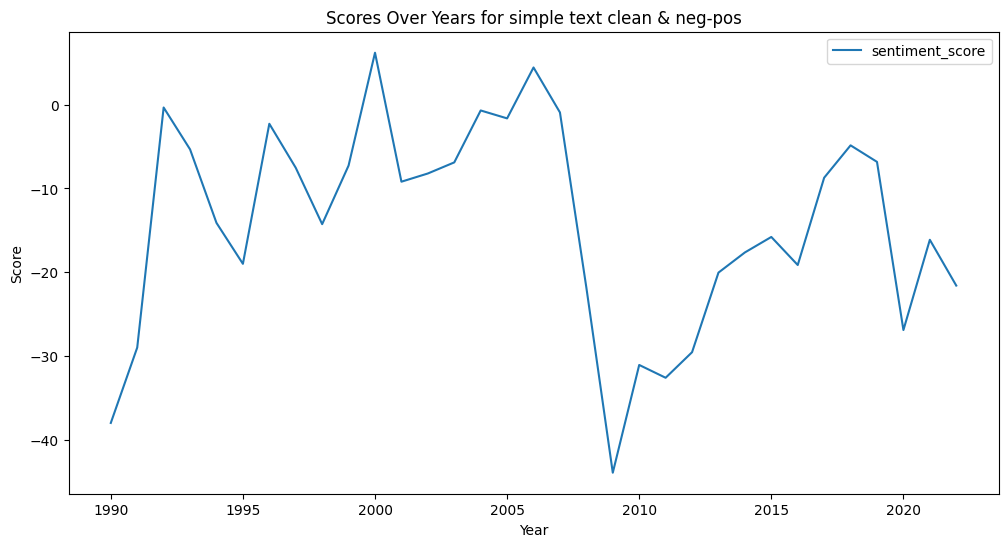

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# List your score columns
score_columns = ['sentiment_score']

for col in score_columns:
    plt.plot(speeches_yearly['year'], speeches_yearly[col], label=col)

plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Scores Over Years for simple text clean & neg-pos')
plt.legend()
plt.show()

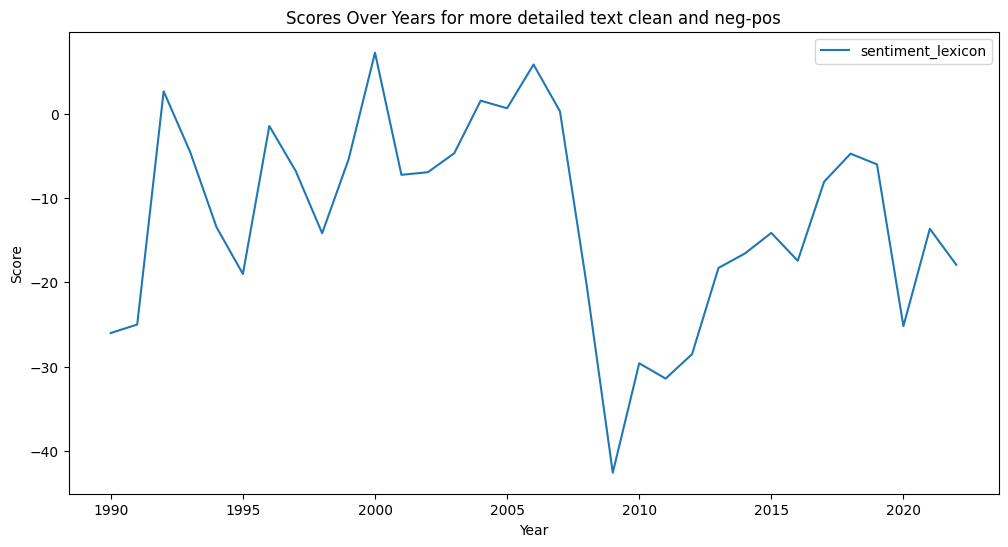

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# List your score columns
score_columns = ['sentiment_lexicon']

for col in score_columns:
    plt.plot(speeches_yearly_2['year'], speeches_yearly_2[col], label=col)

plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Scores Over Years for more detailed text clean and neg-pos')
plt.legend()
plt.show()

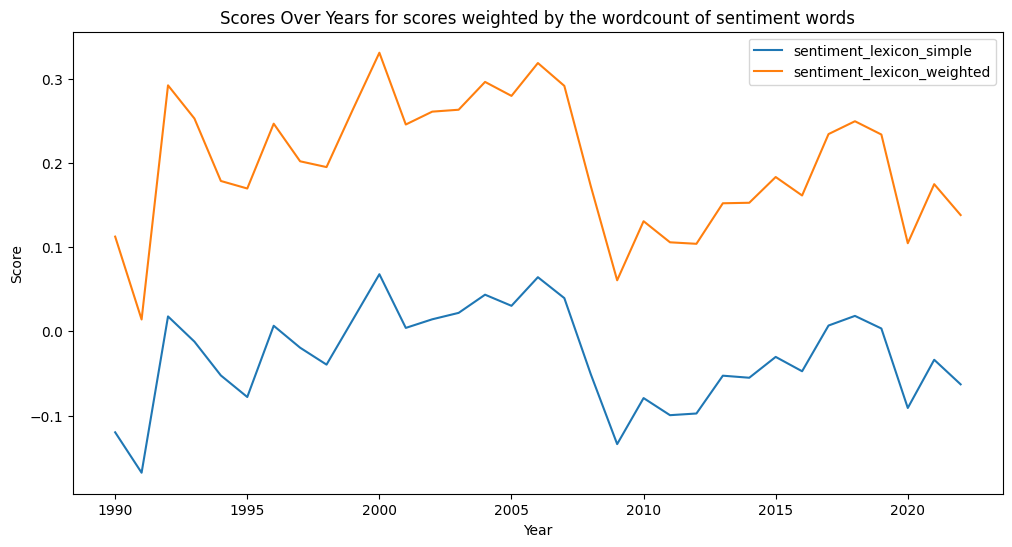

In [78]:
plt.figure(figsize=(12, 6))

# List your score columns
score_columns = ['sentiment_lexicon_simple', 'sentiment_lexicon_weighted']

for col in score_columns:
    plt.plot(speeches_yearly_2['year'], speeches_yearly_2[col], label=col)

plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Scores Over Years for scores weighted by the wordcount of sentiment words')
plt.legend()
plt.show()